# Natural Language Processing

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import nltk as nltk
import seaborn as sns
import datetime
import math
import numpy as np
from sklearn.cluster import DBSCAN

# Modulos de NLP
import gensim
from nltk import SnowballStemmer
#from gensim import corpora
from nltk import word_tokenize
#import pyLDAvis.gensim


Levantamos el archivo

In [4]:
df = pd.read_csv('tweets_cuentas20220707.csv', sep='|')

/Users/a308156/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head(20)

,created_at,screen_name,full_text,location,favorited,favorite_count,hashtags,user_mentions,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,palabra_clave,user_friends_count,retweet_count,retweeted,followers_count,user_id,tw_id,geo,es_contenido
0,2022-07-07 19:17:33,clarincom,¿Confesó la mano? La imagen de Matías Suárez y...,Argentina,0.0,6.0,[],[],NaN,NaN,None,@clarincom,269.0,0.0,0.0,3381607.0,8105922,1545124879824977921,NaN,True
1,2022-07-07 19:16:05,clarincom,El tenista español debía enfrentar a Kyrgios e...,Argentina,0.0,7.0,[],[],1.545117e+18,8105922.0,clarincom,@clarincom,269.0,1.0,0.0,3381607.0,8105922,1545124512403963904,NaN,False
2,2022-07-07 19:14:15,clarincom,Sergio Massa recibió a Silvina Batakis y habla...,Argentina,0.0,5.0,[],[],NaN,NaN,None,@clarincom,269.0,0.0,0.0,3381607.0,8105922,1545124049973657604,NaN,True
3,2022-07-07 19:09:47,clarincom,Una mujer embarazada está presa por defenderse...,Argentina,0.0,8.0,[],[],NaN,NaN,None,@clarincom,269.0,0.0,0.0,3381607.0,8105922,1545122926755807232,NaN,True
4,2022-07-07 19:06:39,clarincom,El flamante DT de Rosario Central volvió a hab...,Argentina,0.0,9.0,[],[],NaN,NaN,None,@clarincom,269.0,2.0,0.0,3381607.0,8105922,1545122139111657474,NaN,True
5,2022-07-07 18:59:54,clarincom,Rafa Nadal se bajó de Wimbledon afectado por u...,Argentina,0.0,7.0,[],[],NaN,NaN,None,@clarincom,269.0,0.0,0.0,3381607.0,8105922,1545120440762486784,NaN,True
6,2022-07-07 18:51:03,clarincom,Día 134 de la guerra: misiles rusos impactaron...,Argentina,0.0,7.0,[],[],NaN,NaN,None,@clarincom,269.0,4.0,0.0,3381607.0,8105922,1545118213431762944,NaN,True
7,2022-07-07 18:45:22,clarincom,🔴AHORA Rafa Nadal se bajó de Wimbledon afect...,Argentina,0.0,13.0,[],[],NaN,NaN,None,@clarincom,269.0,4.0,0.0,3381607.0,8105922,1545116781148258306,NaN,True
8,2022-07-07 18:44:37,clarincom,Silvina Batakis se reunió con Manzur y adelant...,Argentina,0.0,6.0,[],[],NaN,NaN,None,@clarincom,269.0,1.0,0.0,3381607.0,8105922,1545116594149408769,NaN,True
9,2022-07-07 18:36:29,clarincom,La funcionaria además contó detalles algunos d...,Argentina,0.0,11.0,[],[],NaN,NaN,None,@clarincom,269.0,1.0,0.0,3381607.0,8105922,1545114546045681671,NaN,True


In [6]:
df['screen_name'].unique()

array(['clarincom', 'LANACION', 'todonoticias', 'telefenoticias',
       'pagina12', 'DiarioOle', 'infobae', 'TyCSports', 'SC_ESPN',
       'ESPNFutbolArg', 'C5N', 'A24COM', 'AmericaTV', 'eltreceoficial',
       'canal26noticias', 'TV_Publica', 'radiolared', 'radiomitre'],
      dtype=object)

In [7]:
df.loc[df['screen_name']=='todonoticias','full_text'][50:51].values

array(['RT @TNFamosos: Rodrigo De Paul sorprendió a sus hijos y los llevó a ver un show en plena negociación por su cuota alimentaria https://t.co/…'],
      dtype=object)

In [8]:
df.screen_name.value_counts()

canal26noticias    6500
clarincom          3250
C5N                3250
radiolared         3250
TV_Publica         3250
eltreceoficial     3250
AmericaTV          3250
A24COM             3250
radiomitre         3250
SC_ESPN            3250
TyCSports          3250
infobae            3250
pagina12           3250
telefenoticias     3250
todonoticias       3250
LANACION           3249
DiarioOle          3249
ESPNFutbolArg      3249
Name: screen_name, dtype: int64

In [9]:
df.full_text

0        ¿Confesó la mano? La imagen de Matías Suárez y...
1        El tenista español debía enfrentar a Kyrgios e...
2        Sergio Massa recibió a Silvina Batakis y habla...
3        Una mujer embarazada está presa por defenderse...
4        El flamante DT de Rosario Central volvió a hab...
                               ...                        
61742                              https://t.co/RsYb4Yqq9V
61743    📢 Jorge Lanata, en su programa “Periodismo Par...
61744    Compró un pedazo de carne y se encontró con un...
61745    📢 En la previa del partido entre Boca y Arsena...
61746    Boca ganó con equipo alternativo en el debut d...
Name: full_text, Length: 61747, dtype: object

## Stop Words

In [10]:
stw_adhoc = ["hola",'usuarios','usuario','tardes','noches','buenas','estimados','necesito','solicito','necesitamos','favor','consulta','gracias','espero','impacto','igualmente','vemos','analizamos','avisar','pasás','querido','viene','http','xq','rato','llamo','rt','pasa','facilitar','acaban','parecen','reconoce','aparece','gente','brindar','escribirnos','funciona','tenes','quiero','mandarles','resto','alguien','po','co','po','simple','at','favor','contacto','atiende','podes','metodo','https','ponen','ayuda','comunicarme','generar','recuperar','pedimos','entrar','ayudarte','consulta','saludos','mostrar','esperando','haganse','ac','gracias','ok','necesito','dm','pagar','responder','empieza','hice','veo','en']
stop_words = ["0","1","2","3","4","5","6","7","8","9","_",'a',"actualmente","acuerdo","adelante","ademas","además","adrede","afirmó","agregó","ahi","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alli","allí","alrededor","ambos","ampleamos","antano","antaño","ante","anterior","antes","apenas","aproximadamente","aquel","aquella","aquellas","aquello","aquellos","aqui","aquél","aquélla","aquéllas","aquéllos","aquí","arriba","arribaabajo","aseguró","asi","así","atras","aun","aunque","ayer","añadió","aún","b","bajo","bastante","bien","breve","buen","buena","buenas","bueno","buenos","c","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","claro","comentó","como","con","conmigo","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contigo","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanta","cuantas","cuanto","cuantos","cuatro","cuenta","cuál","cuáles","cuándo","cuánta","cuántas","cuánto","cuántos","cómo","d","da","dado","dan","dar","de","debajo","debe","deben","debido","decir","dejó","del","delante","demasiado","demás","dentro","deprisa","desde","despacio","despues","después","detras","detrás","dia","dias","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","día","días","dónde","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","enfrente","enseguida","entonces","entre","era","erais","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estabais","estaban","estabas","estad","estada","estadas","estado","estados","estais","estamos","estan","estando","estar","estaremos","estará","estarán","estarás","estaré","estaréis","estaría","estaríais","estaríamos","estarían","estarías","estas","este","estemos","esto","estos","estoy","estuve","estuviera","estuvierais","estuvieran","estuvieras","estuvieron","estuviese","estuvieseis","estuviesen","estuvieses","estuvimos","estuviste","estuvisteis","estuviéramos","estuviésemos","estuvo","está","estábamos","estáis","están","estás","esté","estéis","estén","estés","ex","excepto","existe","existen","explicó","expresó","f","fin","final","fue","fuera","fuerais","fueran","fueras","fueron","fuese","fueseis","fuesen","fueses","fui","fuimos","fuiste","fuisteis","fuéramos","fuésemos","g","general","gran","grandes","gueno","h","ha","haber","habia","habida","habidas","habido","habidos","habiendo","habla","hablan","habremos","habrá","habrán","habrás","habré","habréis","habría","habríais","habríamos","habrían","habrías","habéis","había","habíais","habíamos","habían","habías","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","has","hasta","hay","haya","hayamos","hayan","hayas","hayáis","he","hecho","hemos","hicieron","hizo","horas","hoy","hube","hubiera","hubierais","hubieran","hubieras","hubieron","hubiese","hubieseis","hubiesen","hubieses","hubimos","hubiste","hubisteis","hubiéramos","hubiésemos","hubo","i","igual","incluso","indicó","informo","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","j","junto","k","l","la","lado","largo","las","le","lejos","les","llegó","lleva","llevar","lo","los","luego","lugar","m","mal","manera","manifestó","mas","mayor","me","mediante","medio","mejor","mencionó","menos","menudo","mi","mia","mias","mientras","mio","mios","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","n","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","p","pais","para","parece","parte","partir","pasada","pasado","paìs","peor","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","por qué","porque","posible","primer","primera","primero","primeros","principalmente","pronto","propia","propias","propio","propios","proximo","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","q","qeu","que","quedó","queremos","quien","quienes","quiere","quiza","quizas","quizá","quizás","quién","quiénes","qué","r","raras","realizado","realizar","realizó","repente","respecto","s","sabe","sabeis","sabemos","saben","saber","sabes","sal","salvo","se","sea","seamos","sean","seas","segun","segunda","segundo","según","seis","ser","sera","seremos","será","serán","serás","seré","seréis","sería","seríais","seríamos","serían","serías","seáis","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","soyos","su","supuesto","sus","suya","suyas","suyo","suyos","sé","sí","sólo","t","tal","tambien","también","tampoco","tan","tanto","tarde","te","temprano","tendremos","tendrá","tendrán","tendrás","tendré","tendréis","tendría","tendríais","tendríamos","tendrían","tendrías","tened","teneis","tenemos","tener","tenga","tengamos","tengan","tengas","tengo","tengáis","tenida","tenidas","tenido","tenidos","teniendo","tenéis","tenía","teníais","teníamos","tenían","tenías","tercera","ti","tiempo","tiene","tienen","tienes","toda","todas","todavia","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuve","tuviera","tuvierais","tuvieran","tuvieras","tuvieron","tuviese","tuvieseis","tuviesen","tuvieses","tuvimos","tuviste","tuvisteis","tuviéramos","tuviésemos","tuvo","tuya","tuyas","tuyo","tuyos","tú","u","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","ustedes","v","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","w","x","y","ya","yo","z","él","éramos","ésa","ésas","ése","ésos","ésta","éstas","éste","éstos","última","últimas","último","últimos"]
stop_words = stop_words + stw_adhoc 

## Tokenizar

In [13]:
lista = [word_tokenize(t) for t in df.full_text]

In [14]:
df.shape

(61747, 20)

In [15]:
lista[0]

['¿Confesó',
 'la',
 'mano',
 '?',
 'La',
 'imagen',
 'de',
 'Matías',
 'Suárez',
 'y',
 'Julián',
 'Álvarez',
 'hablando',
 'después',
 'del',
 'gol',
 'https',
 ':',
 '//t.co/KyP3UFqZmh']

In [16]:
df.iloc[10].full_text

"Lenguaje inclusivo: la ministra Soledad Acuña cargó contra el INADI y recordó que 'perseguía a directores de escuela' https://t.co/OaYai4B2AL"

In [17]:
lista[10]

['Lenguaje',
 'inclusivo',
 ':',
 'la',
 'ministra',
 'Soledad',
 'Acuña',
 'cargó',
 'contra',
 'el',
 'INADI',
 'y',
 'recordó',
 'que',
 "'perseguía",
 'a',
 'directores',
 'de',
 'escuela',
 "'",
 'https',
 ':',
 '//t.co/OaYai4B2AL']

## Pasar a minuscula y sacar signos de puntuación

In [18]:
text_data = []
for texto in lista:
    lower_tokens = [t.lower() for t in texto if t.isalpha()]
    text_data.append(lower_tokens)

In [19]:
lista[10]

['Lenguaje',
 'inclusivo',
 ':',
 'la',
 'ministra',
 'Soledad',
 'Acuña',
 'cargó',
 'contra',
 'el',
 'INADI',
 'y',
 'recordó',
 'que',
 "'perseguía",
 'a',
 'directores',
 'de',
 'escuela',
 "'",
 'https',
 ':',
 '//t.co/OaYai4B2AL']

In [98]:
len(text_data[10]), len(lista[10])

(35, 49)

## Stemming

In [20]:
from nltk import SnowballStemmer
stemmer = SnowballStemmer('spanish')
stem_w = [stemmer.stem(t) for t in text_data[10]]
print('Texto original: ',text_data[10])
print('\n')
print('Texto Stemizado: ',stem_w)

Texto original:  ['lenguaje', 'inclusivo', 'la', 'ministra', 'soledad', 'acuña', 'cargó', 'contra', 'el', 'inadi', 'y', 'recordó', 'que', 'a', 'directores', 'de', 'escuela', 'https']


Texto Stemizado:  ['lenguaj', 'inclus', 'la', 'ministr', 'soled', 'acuñ', 'carg', 'contr', 'el', 'inadi', 'y', 'record', 'que', 'a', 'director', 'de', 'escuel', 'https']


## Stop Words

In [21]:
lista[10]

['Lenguaje',
 'inclusivo',
 ':',
 'la',
 'ministra',
 'Soledad',
 'Acuña',
 'cargó',
 'contra',
 'el',
 'INADI',
 'y',
 'recordó',
 'que',
 "'perseguía",
 'a',
 'directores',
 'de',
 'escuela',
 "'",
 'https',
 ':',
 '//t.co/OaYai4B2AL']

In [22]:
i = 10

no_stop = [t for t in text_data[i] if t not in stop_words]

print(text_data[i])
print('\n')
print(no_stop)

['lenguaje', 'inclusivo', 'la', 'ministra', 'soledad', 'acuña', 'cargó', 'contra', 'el', 'inadi', 'y', 'recordó', 'que', 'a', 'directores', 'de', 'escuela', 'https']


['lenguaje', 'inclusivo', 'ministra', 'soledad', 'acuña', 'cargó', 'inadi', 'recordó', 'directores', 'escuela']


## Nube de Palabras

In [26]:
from wordcloud import WordCloud
from nltk import word_tokenize
from collections import Counter

In [27]:
def prepara_nube_palabras_menciones(df,cuenta,stop_words):
    df = df[df.screen_name == cuenta]
    
    df.drop_duplicates(inplace=True, subset=["tw_id"])
    
    lista = [word_tokenize(t) for t in df.full_text]
    flat_list = [item for sublist in lista for item in sublist]

    lower_tokens = [t.lower() for t in flat_list if t.isalpha()]

    stop_words = stop_words
    stop_words.append(cuenta[1:].lower())
    no_stop = [t for t in lower_tokens if t not in stop_words]

    text = " ".join(no_stop)
    return (text,no_stop)
    
def nube_palabras(text,background_color='white', figsize =(18,8) ):
    plt.figure(figsize=figsize)
    wordcloud = WordCloud(collocations=False,max_font_size=40,background_color='white',width=400,height=200).generate(text)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    
    plt.show()
    


In [28]:
df.screen_name.unique()

array(['clarincom', 'LANACION', 'todonoticias', 'telefenoticias',
       'pagina12', 'DiarioOle', 'infobae', 'TyCSports', 'SC_ESPN',
       'ESPNFutbolArg', 'C5N', 'A24COM', 'AmericaTV', 'eltreceoficial',
       'canal26noticias', 'TV_Publica', 'radiolared', 'radiomitre'],
      dtype=object)

In [29]:
df.loc[df.screen_name=='todonoticias',:]

,created_at,screen_name,full_text,location,favorited,favorite_count,hashtags,user_mentions,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,palabra_clave,user_friends_count,retweet_count,retweeted,followers_count,user_id,tw_id,geo,es_contenido
6499,2022-07-07 19:22:02,todonoticias,RT @tndeportivo: Julio César Falcioni dejó de ...,Argentina,False,0.0,[],"[{'screen_name': 'tndeportivo', 'name': 'TN De...",NaN,NaN,None,@todonoticias,22.0,1.0,False,5568391.0,25992212,1545126010445672454,NaN,True
6500,2022-07-07 18:50:33,todonoticias,RT @tndeportivo: Rafael Nadal anunció que se b...,Argentina,False,0.0,[],"[{'screen_name': 'tndeportivo', 'name': 'TN De...",NaN,NaN,None,@todonoticias,22.0,2.0,False,5568391.0,25992212,1545118088265224192,NaN,True
6501,2022-07-07 18:46:33,todonoticias,RT @TNTecno: El Apple Watch Series 8 tendrá un...,Argentina,False,0.0,[],"[{'screen_name': 'TNTecno', 'name': 'TN Tecno'...",NaN,NaN,None,@todonoticias,22.0,1.0,False,5568391.0,25992212,1545117078566318080,NaN,True
6502,2022-07-07 18:12:57,todonoticias,Máximo Kirchner reaparece tras los cambios en ...,Argentina,False,8.0,[],[],NaN,NaN,None,@todonoticias,22.0,4.0,False,5568391.0,25992212,1545108625089302536,NaN,True
6503,2022-07-07 18:03:33,todonoticias,RT @TNestilo: Romina Malaspina festejó su cump...,Argentina,False,0.0,[],"[{'screen_name': 'TNestilo', 'name': 'TN Estil...",NaN,NaN,None,@todonoticias,22.0,1.0,False,5568391.0,25992212,1545106258490826753,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,2022-06-16 15:21:06,todonoticias,RT @TNConBienestar: Las bebidas azucaradas aum...,Argentina,False,0.0,[],"[{'screen_name': 'TNConBienestar', 'name': 'TN...",NaN,NaN,None,@todonoticias,22.0,2.0,False,5568391.0,25992212,1537455233642557441,NaN,True
9745,2022-06-16 15:21:05,todonoticias,RT @TNTecno: Backup: consejos para guardar de ...,Argentina,False,0.0,[],"[{'screen_name': 'TNTecno', 'name': 'TN Tecno'...",NaN,NaN,None,@todonoticias,22.0,4.0,False,5568391.0,25992212,1537455226449702912,NaN,True
9746,2022-06-16 15:18:02,todonoticias,Cinco verdades contundentes sobre la guerra en...,Argentina,False,5.0,[],[],NaN,NaN,None,@todonoticias,22.0,1.0,False,5568391.0,25992212,1537454462221971456,NaN,True
9747,2022-06-16 15:16:34,todonoticias,RT @tndeportivo: “Estamos esperando que vengas...,Argentina,False,0.0,[],"[{'screen_name': 'tndeportivo', 'name': 'TN De...",NaN,NaN,None,@todonoticias,22.0,2.0,False,5568391.0,25992212,1537454089520312320,NaN,True


/Users/a308156/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


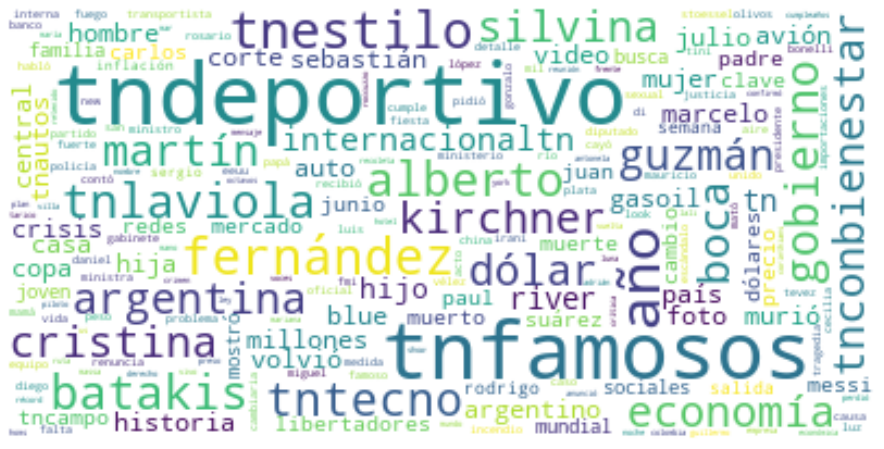

In [31]:
text_data_nube = prepara_nube_palabras_menciones(df,'todonoticias',stop_words)
nube_palabras(text_data_nube[0])


# Pre-procesamiento

## N-Gram

In [32]:
bigram = gensim.models.Phrases(text_data, min_count = 5, threshold = 15) # a thresholds más grandes menos frases.
bigram_mod = gensim.models.phrases.Phraser(bigram)


In [33]:
bigram.vocab

{'la': 49368,
 'mano': 579,
 'la_mano': 205,
 'mano_la': 2,
 'imagen': 130,
 'la_imagen': 40,
 'de': 72824,
 'imagen_de': 32,
 'matías': 391,
 'de_matías': 97,
 'suárez': 572,
 'matías_suárez': 43,
 'y': 30985,
 'suárez_y': 78,
 'julián': 293,
 'y_julián': 16,
 'álvarez': 353,
 'julián_álvarez': 217,
 'hablando': 37,
 'álvarez_hablando': 1,
 'después': 562,
 'hablando_después': 1,
 'del': 15801,
 'después_del': 110,
 'gol': 1038,
 'del_gol': 27,
 'https': 75829,
 'gol_https': 8,
 'el': 44170,
 'tenista': 94,
 'el_tenista': 43,
 'español': 147,
 'tenista_español': 13,
 'debía': 13,
 'español_debía': 1,
 'enfrentar': 128,
 'debía_enfrentar': 1,
 'a': 29831,
 'enfrentar_a': 81,
 'kyrgios': 116,
 'a_kyrgios': 14,
 'en': 44457,
 'kyrgios_en': 23,
 'las': 8977,
 'en_las': 742,
 'semis': 14,
 'las_semis': 5,
 'pero': 1463,
 'semis_pero': 1,
 'convocó': 40,
 'pero_convocó': 1,
 'una': 9369,
 'convocó_una': 2,
 'conferencia': 147,
 'una_conferencia': 20,
 'para': 10007,
 'conferencia_para': 1,


In [34]:
list(bigram_mod[text_data])

[['la',
  'mano',
  'la',
  'imagen',
  'de',
  'matías_suárez',
  'y',
  'julián_álvarez',
  'hablando',
  'después',
  'del',
  'gol',
  'https'],
 ['el',
  'tenista_español',
  'debía',
  'enfrentar',
  'a',
  'kyrgios',
  'en',
  'las',
  'semis',
  'pero',
  'convocó',
  'una',
  'conferencia',
  'para',
  'explicar',
  'que',
  'deja',
  'el',
  'torneo',
  'más',
  'https',
  'https'],
 ['sergio_massa',
  'recibió',
  'a',
  'silvina_batakis',
  'y',
  'hablaron',
  'de',
  'la',
  'agenda',
  'legislativa',
  'https'],
 ['una_mujer',
  'embarazada',
  'está',
  'presa',
  'por',
  'defenderse',
  'de',
  'su',
  'maltratador',
  'a',
  'días',
  'del',
  'parto',
  'le',
  'niegan',
  'la',
  'domiciliaria',
  'https'],
 ['el',
  'flamante_dt',
  'de',
  'rosario_central',
  'volvió',
  'a',
  'hablar',
  'de',
  'quien',
  'se',
  'quedó',
  'a',
  'un',
  'paso',
  'de',
  'ser',
  'su',
  'ayudante',
  'de',
  'campo',
  'y',
  'le_tiró',
  'otro',
  'palazo',
  'para',
  'c

## TF-IDF

In [35]:
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
dictionary = Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
model = TfidfModel(corpus)  

In [36]:
i=6
print(model[corpus[i]])
print('\n')
print(corpus[i])
text_data[i]

[(0, 0.014719640667982585), (5, 0.0014669848769262035), (8, 0.02536716468632452), (14, 0.03878986839199138), (20, 0.02546759044697371), (85, 0.38729262266196735), (86, 0.1501247741412441), (87, 0.15211411260515414), (88, 0.1692234057560722), (89, 0.19487524636547607), (90, 0.4429617841189707), (91, 0.37833188911605226), (92, 0.3013543889609356), (93, 0.29482814693054726), (94, 0.37101043671249806), (95, 0.28277690335655625)]


[(0, 1), (5, 1), (8, 1), (14, 1), (20, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1)]


['día',
 'de',
 'la',
 'guerra',
 'misiles',
 'rusos',
 'impactaron',
 'esta',
 'madrugada',
 'a',
 'dos',
 'hangares',
 'agrícolas',
 'en',
 'odesa',
 'https']

# Embeddings

In [37]:
from gensim.models.word2vec import Word2Vec

In [44]:
# "window" es el tamaño de la ventana. windows = 10, usa 10 palabras a la izquierda y 10 palabras a la derecha
# "n_dim" es la dimension (i.e. el largo) de los vectores de word2vec
# "workers" es el numero de cores que usa en paralelo. Para aprovechar eso es necesario tener instalado Cython)
# "sample": word2vec filtra palabras que aparecen una fraccion mayor que "sample"
# "min_count": Word2vec filtra palabras con menos apariciones que  "min_count"
# "sg": para correr el Skipgram model (sg = 1), para correr el CBOW (sg = 0)
# para mas detalle ver: https://radimrehurek.com/gensim/models/word2vec.html
n_dim = 30
w2v_model = Word2Vec(text_data, vector_size=n_dim, workers=4, min_count = 5, window = 5, sample = 1e-3,negative=10,sg=1)

## Resultados

In [60]:
print ("river-libertadores similarity:",w2v_model.wv.n_similarity(["river"], ["libertadores"]))
print ("boca-libertadores similarity:",w2v_model.wv.n_similarity(["boca"], ["libertadores"]) )
print ("aldosivi-libertadores similarity:",w2v_model.wv.n_similarity(["gimnasia"], ["libertadores"]) )
print("\n")
print ("macri-presidente similarity:",w2v_model.wv.n_similarity(["macri"], ["presidente"]) )
print ("alberto-presidente similarity:",w2v_model.wv.n_similarity(["alberto"], ["presidente"]) )
print("\n")
print ("macri-larreta similarity:",w2v_model.wv.n_similarity(["macri"], ["larreta"]) )
print ("alberto-larreta similarity:",w2v_model.wv.n_similarity(["alberto"], ["larreta"]) )

print ("ministro-economía similarity:",w2v_model.wv.n_similarity(["ministro"], ["economía"]) )
print ("messi-economía similarity:",w2v_model.wv.n_similarity(["messi"], ["economía"]) )

river-libertadores similarity: 0.8053749
boca-libertadores similarity: 0.721514
aldosivi-libertadores similarity: 0.5844834


macri-presidente similarity: 0.66074896
alberto-presidente similarity: 0.7843965


macri-larreta similarity: 0.6723691
alberto-larreta similarity: 0.5663726
ministro-economía similarity: 0.8545408
messi-economía similarity: 0.30916432


In [49]:
w2v_model.wv.most_similar(positive=["libertadores"], negative=[], topn=25)

[('copalibertadores', 0.9198664426803589),
 ('octavos', 0.8846743106842041),
 ('revancha', 0.8819670677185059),
 ('ida', 0.8726409077644348),
 ('final', 0.8665342330932617),
 ('conmebol', 0.8612962365150452),
 ('copa', 0.8532084822654724),
 ('fortaleza', 0.8482102155685425),
 ('vélez', 0.8446635007858276),
 ('tolima', 0.8325215578079224),
 ('velez', 0.8260810971260071),
 ('lima', 0.8212166428565979),
 ('corinthians', 0.8189141154289246),
 ('sudamericana', 0.8188269734382629),
 ('colón', 0.8182404041290283),
 ('eliminación', 0.8179445266723633),
 ('copera', 0.8169448375701904),
 ('titulares', 0.816746175289154),
 ('fortín', 0.8151343464851379),
 ('concentrados', 0.8142516016960144),
 ('eliminado', 0.8132804036140442),
 ('hulk', 0.8108391761779785),
 ('maracaná', 0.8107996582984924),
 ('llave', 0.8055286407470703),
 ('river', 0.8053749203681946)]

In [51]:
w2v_model.wv.most_similar(positive=["wanda"], negative=[], topn=15)

[('nara', 0.9852675199508667),
 ('zaira', 0.9208464622497559),
 ('icardi', 0.9000657796859741),
 ('roitman', 0.8862693905830383),
 ('look', 0.8781293630599976),
 ('stefi', 0.8616417646408081),
 ('evaluna', 0.8559460043907166),
 ('pampita', 0.8507353663444519),
 ('tierno', 0.847635805606842),
 ('jakob', 0.8467912077903748),
 ('romántico', 0.8457179069519043),
 ('nicole', 0.8449035882949829),
 ('malla', 0.8401424288749695),
 ('von', 0.8358867168426514),
 ('neumann', 0.8340703248977661)]

In [29]:
w2v_model.wv.n_similarity(["alberto"],["brasil"])

0.37795627

In [30]:
[w2v_model.wv.n_similarity(["crisis"], [i]) for i in ["argentina", "chile", "bolivia", "brasil"]]

[0.18608187, 0.26341972, 0.3525854, 0.30579343]

<AxesSubplot:>

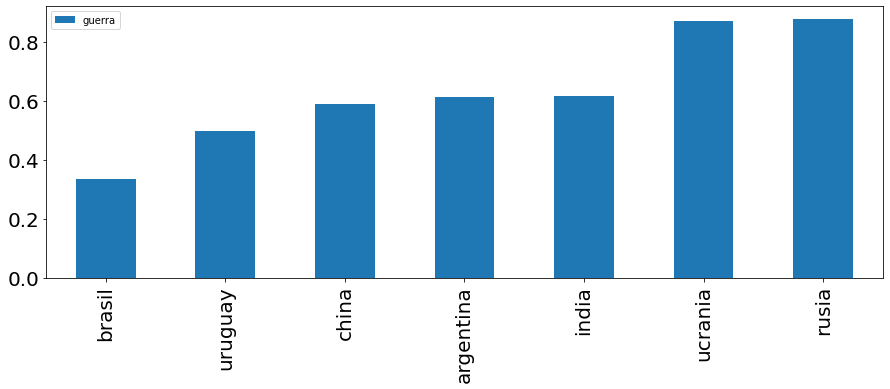

In [52]:
# presidente, ganador, provincia
target_word= "guerra"
topicos = ["rusia","argentina","brasil","uruguay","china","india", "ucrania"]
crimen = []
for word in topicos:
    crimen.append(w2v_model.wv.n_similarity([target_word], [word]))
    
pd.DataFrame(crimen,index = topicos,columns=[target_word]).sort_values(by=target_word).plot(kind="bar",figsize=(15,5), fontsize=20)

In [53]:
p_sociedad = ['hambre','pobreza','industria','campo','fmi','crisis','elecciones','inseguridad','dinero']
p_paises = ["perú","bolivia","paraguay","uruguay","brasil","colombia",'chile','españa']
p_tecno = ["tecnología","internet","web",'facebook','instagram']
p_deporte = ['boca','river','independiente','racing','libertadores','tenis','sudamericana']
p_politicos = ["macri", 'cristina', 'alberto', 'vidal', 'kicillof','bolsonaro','trump','biden','larreta']
p_pandemia = ["covid", 'vacuna', 'sputnik', 'pandemia', 'coronavirus','cuarentena']
palabras =  p_paises + p_tecno + p_politicos+ p_sociedad + p_deporte + p_pandemia
#colores = ["black"]*len(p_robos)+["blue"]*len(p_ciencias)+["green"]*len(p_tiempo)+["red"]*len(p_paises) +["purple"]*len(p_comida)+["orange"]*len(p_tecno)+["cyan"]*len(p_hogar)
colores = ["black"]*len(p_paises)+["red"]*len(p_tecno)+["orange"]*len(p_politicos)+["blue"]*len(p_sociedad)+["purple"]*len(p_deporte) +["green"]*len(p_pandemia)



In [54]:
# Armo una matriz de distancias
distancias=np.zeros((len(palabras),len(palabras))) #matriz cuadrada
for i,ti in enumerate(palabras):
    for j,tj in enumerate(palabras):
        distancias[i,j] = abs(1-w2v_model.wv.similarity(ti,tj))
print (distancias.shape)
distancias

(44, 44)


array([[0.00000000e+00, 5.00192106e-01, 4.35371757e-01, ...,
        6.46746635e-01, 5.55813551e-01, 5.08810103e-01],
       [5.00192106e-01, 0.00000000e+00, 2.52083600e-01, ...,
        4.30218816e-01, 5.83754778e-01, 1.72966480e-01],
       [4.35371757e-01, 2.52083600e-01, 0.00000000e+00, ...,
        6.67579949e-01, 7.19391257e-01, 3.83683622e-01],
       ...,
       [6.46746635e-01, 4.30218816e-01, 6.67579949e-01, ...,
        0.00000000e+00, 2.52250731e-01, 3.39747667e-01],
       [5.55813551e-01, 5.83754778e-01, 7.19391257e-01, ...,
        2.52250731e-01, 5.96046448e-08, 5.56009710e-01],
       [5.08810103e-01, 1.72966480e-01, 3.83683622e-01, ...,
        3.39747667e-01, 5.56009710e-01, 0.00000000e+00]])

In [55]:
# Reduccion de la dimensionalidad y visualizacion 
from sklearn.manifold import MDS
from sklearn.manifold import TSNE 
def visualize_embeddings(distancias,palabras,colores,perplexity):
    plt.figure(figsize=(35,8))
    # Reduccion de la dimensionalidad y visualizacion 
    mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                       dissimilarity="precomputed", n_jobs=4)
    Y = mds.fit(distancias).embedding_
    plt.subplot(1,2,1)
    plt.scatter(Y[:, 0], Y[:, 1],color="black",s=3)
    for label, x, y, color in zip(palabras, Y[:, 0], Y[:, 1],colores):
        plt.annotate(label, xy=(x, y), xytext=(0, 0),color=color, textcoords='offset points',size=13)
    plt.title("MDS")

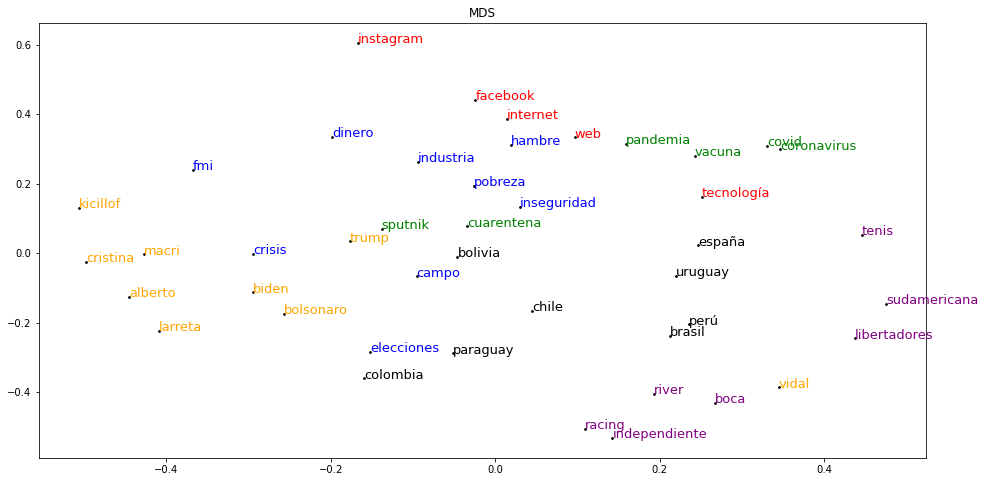

In [56]:
visualize_embeddings(distancias,palabras,colores,perplexity=10)